Импортирую необходимые библиотеки

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import plotly.graph_objects as go
import operator

Загружаю и смотрю информацию о данных

In [65]:
employees = pd.read_csv('employees.csv') 
employees.info()
employees.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Табельный номер      1259 non-null   object
 1   Сотрудник            2337 non-null   object
 2   Дата рождения        2335 non-null   object
 3   Дата приема          2337 non-null   object
 4   Дата увольнения      1001 non-null   object
 5   Физическое лицо.Пол  2337 non-null   object
dtypes: object(6)
memory usage: 54.8+ KB


,Табельный номер,Сотрудник,Дата рождения,Дата приема,Дата увольнения,Физическое лицо.Пол
0,0000001321,fea8d467089c2c8aab99ac8dd2542f3b,1989-04-02,2019-03-04,NaN,Женский
1,0000002143,78a05335ee2ebf8746b49680007f6ac9,1987-07-03,2021-05-12,NaN,Женский
2,0000002114,dfb4ca9b1f10f7da65db14abd1377806,1989-07-19,2021-04-19,NaN,Женский
3,0000001879,39aede4b27778304ae63f8593b65f4f5,1994-10-15,2020-12-07,NaN,Женский
4,0000001562,d5699996eb87c6f17a6287aef3202ef9,1982-07-01,2020-03-02,NaN,Женский
5,0000002124,b89fb46f992434395fd22973c22e9284,1985-04-17,2021-04-23,NaN,Женский
6,0000000540,73f406130af4fbc120e97213a29d11f4,1976-03-14,2013-02-04,NaN,Женский
7,0000001079,dfd6e45294075aa1a31f38822ac398f5,1983-06-11,2017-06-23,NaN,Женский
8,0000001261,f20913bd521bb1d7fdf7136a2886bd40,1995-10-26,2018-11-19,NaN,Женский
9,0000001182,ab346305c8ab3dff62a14d35b8eff192,1989-03-19,2018-04-16,NaN,Женский


In [66]:
grades = pd.read_csv('grades.csv') 
grades.info()
grades.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7541 entries, 0 to 7540
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Дата       7541 non-null   object
 1   Сотрудник  7541 non-null   object
 2   БН         7541 non-null   object
 3   grade      7541 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 147.3+ KB


,Дата,Сотрудник,БН,grade
0,2019-01-01,8a195bab54f69a76d6be02a70692dc8e,ФАС,-1
1,2019-01-01,60af5ad43f95c071e5f3f3588281834c,Руководитель,9
2,2019-01-01,2e32f3195c2fd2d6660a4e48f5dbd40a,SOA-ВТБ,3
3,2019-01-01,c338b675efc7c06ca9f54c03c312ead1,BigData Solutions,2
4,2019-01-01,6f216663ad0259436e16b60c5202ce86,ФАС,-1


In [67]:
cities = pd.read_csv('cities.csv') 
cities.info()
cities.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6295 entries, 0 to 6294
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Дата       6295 non-null   object
 1   Сотрудник  6295 non-null   object
 2   Филиал     5986 non-null   object
 3   Город      5081 non-null   object
dtypes: object(4)
memory usage: 98.4+ KB


,Дата,Сотрудник,Филиал,Город
0,2005-02-08,60af5ad43f95c071e5f3f3588281834c,Москва,Москва
1,2005-02-28,e1e061c61daee1d518a9d8181e64c196,Москва,Москва
2,2005-02-28,8dcd51df55acd1afc191d263848e73d1,Москва,Москва
3,2005-03-01,16e30d6f664c5e4085b1e41e77b5aac0,Москва,Москва
4,2005-08-02,f66dac3272ab7d2398c79cbf9da03363,Москва,Москва


Каждый датасет содержит колонку "Сотрудник". В employees содержится 2337 наблюдений, в grades 7541, в cities 6295. Вероятно в каждом из них некоторые сотрудники имеют свойство повторяться чаще или реже. Попробуем узнать сколько всего сотрудников.

In [68]:
len(np.unique(employees['Сотрудник']))

1895

In [69]:
len(np.unique(grades['Сотрудник']))

2054

In [70]:
len(np.unique(cities['Сотрудник']))

1385

In [71]:
len(set(list(employees['Сотрудник'])+list(grades['Сотрудник'])+list(cities['Сотрудник'])))

2056

Общее количество сотрудников - 2056, количество сотрудников в employees - 1895, в grades - 2054, в cities - 1385. Причиной повторения может быть повторный наем сотрудника или его случайный повтор.

Посмотрим на повторяющихся сотрудников в наборе данных employees, чтобы разобраться в причинах повторов.

In [72]:
mylist = list(employees['Сотрудник'])
for i in [k for k,v in Counter(mylist).items() if v>1]:
    print(employees[employees['Сотрудник']==i])

     Табельный номер                         Сотрудник Дата рождения  \
6         0000000540  73f406130af4fbc120e97213a29d11f4    1976-03-14   
1371             NaN  73f406130af4fbc120e97213a29d11f4    1976-03-14   

     Дата приема Дата увольнения Физическое лицо.Пол  
6     2013-02-04             NaN             Женский  
1371  2013-02-04             NaN             Женский  
     Табельный номер                         Сотрудник Дата рождения  \
7         0000001079  dfd6e45294075aa1a31f38822ac398f5    1983-06-11   
1529             NaN  dfd6e45294075aa1a31f38822ac398f5    1983-06-11   

     Дата приема Дата увольнения Физическое лицо.Пол  
7     2017-06-23             NaN             Женский  
1529  2017-06-23             NaN             Женский  
     Табельный номер                         Сотрудник Дата рождения  \
9         0000001182  ab346305c8ab3dff62a14d35b8eff192    1989-03-19   
1629             NaN  ab346305c8ab3dff62a14d35b8eff192    1989-03-19   

     Дата приема Да

Можно заметить, что дублированные сотрудники содержит полностью идентичную информацию, кроме табельного номера, который отсутствует. Также есть те, кто работал в компании ранее и устроился снова. Для дальнейшего объединения двух таблиц удалим повторяющиеся значения без табельного номера, но оставим записи о тех кто повторно устраивался. Повторяющиеся записи с отсутствующим номером идут после тех, у кого он есть. Это облегчает задачу по удалению дубликатов, но на всякий случай сделаем контроль количества уникальных значений табельного номера и даты приема.

In [73]:
len(list(set(employees['Табельный номер'])))

1260

In [74]:
len(list(set(employees['Дата приема'])))

1039

In [75]:
employees.drop_duplicates(subset=['Сотрудник','Дата приема'], ignore_index=True, inplace = True)
len(np.unique(employees['Сотрудник']))

1895

In [76]:
len(list(set(employees['Табельный номер'])))

1260

In [77]:
len(list(set(employees['Дата приема'])))

1039

Количество совпало, а значит мы удалили тех кого нужно.

Присвоим столбцам 'Дата приема' и 'Дата увольнения' тип datetime, а также выделим количество лет, которые сотрудник работал в компании.

In [78]:
employees['Дата приема'] = pd.to_datetime(employees['Дата приема'], errors='coerce')
employees['Дата увольнения'] = pd.to_datetime(employees['Дата увольнения'], errors='coerce')
employees['period_years'] =(employees['Дата увольнения'] - employees['Дата приема']) / np.timedelta64(1,'Y')
employees.head(100)

,Табельный номер,Сотрудник,Дата рождения,Дата приема,Дата увольнения,Физическое лицо.Пол,period_years
0,0000001321,fea8d467089c2c8aab99ac8dd2542f3b,1989-04-02,2019-03-04,NaT,Женский,NaN
1,0000002143,78a05335ee2ebf8746b49680007f6ac9,1987-07-03,2021-05-12,NaT,Женский,NaN
2,0000002114,dfb4ca9b1f10f7da65db14abd1377806,1989-07-19,2021-04-19,NaT,Женский,NaN
3,0000001879,39aede4b27778304ae63f8593b65f4f5,1994-10-15,2020-12-07,NaT,Женский,NaN
4,0000001562,d5699996eb87c6f17a6287aef3202ef9,1982-07-01,2020-03-02,NaT,Женский,NaN
...,...,...,...,...,...,...,...
95,0000001309,df26433fbeb14eb3c09b69f57857ab26,1992-04-21,2019-02-21,2019-09-09,Мужской,0.547581
96,0000001520,e256dfcadc00b1eb288745abbbed0ac1,1993-06-25,2019-12-10,NaT,Женский,NaN
97,0000000292,95bac873458cd3c9b79aaa5ff2b7c597,1985-06-26,2011-04-04,NaT,Женский,NaN
98,0000000873,cb482d8c8844a36405bdc33b2130943c,1990-03-31,2015-12-01,NaT,Мужской,NaN


Объединим таблицы employees и grades. Удалю всех сотрудников, у которых дата изменения грейда не входит в период их работы с даты приёма до даты увольнения. Т.е. у которых нет информации о грейде в период работы в компании. После чего отсортирую строки в порядке убывания по столбцу "Дата", чтобы после удаления дубликатов оставить строки с максимальной датой изменения грейда. Это понадобится в дальнейшем, чтобы выделить с каким грейдом сотрудник был уволен. Из получившейся таблицы удалим строки с повторяющимися именем сотрудника и датой увольнения.

In [79]:
df = employees.merge(grades, on='Сотрудник', how='left')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 0 to 7568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Табельный номер      5192 non-null   object        
 1   Сотрудник            7569 non-null   object        
 2   Дата рождения        7560 non-null   object        
 3   Дата приема          7569 non-null   datetime64[ns]
 4   Дата увольнения      3547 non-null   datetime64[ns]
 5   Физическое лицо.Пол  7569 non-null   object        
 6   period_years         3547 non-null   float64       
 7   Дата                 7567 non-null   object        
 8   БН                   7567 non-null   object        
 9   grade                7567 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 473.1+ KB


In [81]:
df.dropna(subset=['grade'], inplace = True)
df

,Табельный номер,Сотрудник,Дата рождения,Дата приема,Дата увольнения,Физическое лицо.Пол,period_years,Дата,БН,grade
0,0000001321,fea8d467089c2c8aab99ac8dd2542f3b,1989-04-02,2019-03-04,NaT,Женский,NaN,2019-03-04,ФАС,-1.0
1,0000001321,fea8d467089c2c8aab99ac8dd2542f3b,1989-04-02,2019-03-04,NaT,Женский,NaN,2019-06-01,ФАС,-1.0
2,0000001321,fea8d467089c2c8aab99ac8dd2542f3b,1989-04-02,2019-03-04,NaT,Женский,NaN,2020-09-01,ФАС,-1.0
3,0000002143,78a05335ee2ebf8746b49680007f6ac9,1987-07-03,2021-05-12,NaT,Женский,NaN,2021-05-12,Служба ИТ,-1.0
4,0000002114,dfb4ca9b1f10f7da65db14abd1377806,1989-07-19,2021-04-19,NaT,Женский,NaN,2021-04-19,Технологический офис,-1.0
...,...,...,...,...,...,...,...,...,...,...
7564,NaN,cc5ff99004737559ebe993cb3f0d2fa3,1985-05-31,2017-09-04,2018-10-05,Мужской,1.084211,2017-09-04,Развитие UI-UX,5.0
7565,NaN,cfc0492c47150d5f328b43162ad51b4b,1985-01-29,2016-06-03,2016-06-15,Женский,0.032855,2016-06-03,SOA,1.0
7566,NaN,3c0fa0cce2f57bd3a332e20795fddafb,1994-05-14,2016-09-14,2017-06-16,Мужской,0.752924,2016-09-14,Общее_Менеджеры,4.0
7567,NaN,21d94a99036262153e400154d1e4dafb,1985-07-30,2017-04-03,2018-01-31,Мужской,0.829586,2017-04-03,Общее_Менеджеры,5.0


In [82]:
df.drop(df.loc[operator.or_(df['Дата увольнения'] < df['Дата'], df['Дата приема'] > df['Дата'])].index, inplace = True)

In [83]:
df.sort_values(by='Дата', ascending = False, inplace = True)

In [84]:
df.drop_duplicates(subset=['Сотрудник','Дата увольнения'], ignore_index=True, inplace = True)

In [85]:
df

,Табельный номер,Сотрудник,Дата рождения,Дата приема,Дата увольнения,Физическое лицо.Пол,period_years,Дата,БН,grade
0,0000000829,c9a2d13a965ca10a2af3e1ab488f7ca4,1990-09-10,2015-09-23,NaT,Женский,NaN,2021-09-01,BigData Solutions,3.0
1,0000001728,d1c5c5defd38be6e5e1ec3c4d69a1b45,1988-08-06,2020-09-02,NaT,Мужской,NaN,2021-05-28,SOA-ВТБ,1.0
2,0000001323,8d6c4c2243eeae55c43b171a1f7f7ead,1995-08-12,2019-03-04,NaT,Мужской,NaN,2021-05-27,Инженерные практики,2.0
3,0000001993,18027b24f56ff55f6b034d63c7966194,1988-11-08,2021-02-25,NaT,Женский,NaN,2021-05-25,ФАС,-1.0
4,0000001601,9f945732f19ab9392b5edbbef78a97f9,1985-09-09,2020-04-21,NaT,Женский,NaN,2021-05-24,Служба персонала,-1.0
...,...,...,...,...,...,...,...,...,...,...
1921,NaN,19919377f3cc4d5bed7694d73d09d206,1982-05-17,2010-01-12,2013-03-04,Мужской,3.140379,2012-01-01,Департамент разработки SOA решений,3.0
1922,NaN,4f827d60d9e7bd18eb83895c4d7c16b4,1979-08-21,2011-12-23,2013-03-22,Женский,1.245748,2012-01-01,Служба персонала,-1.0
1923,NaN,002b6d2d8a87173be8de907a011a146c,1987-09-13,2011-10-24,2012-10-05,Женский,0.950054,2012-01-01,Департамент тестирования,2.0
1924,NaN,44a80379423e67132058cfbdcc51ff9a,1977-05-08,2010-08-17,2012-12-20,Женский,2.343648,2012-01-01,Отдел маркетинга,-1.0


Создаю накопительные гистограммы, отображающие процент уволенных сотрудников по кварталам для каждого грейда и бизнес направления. Так как бизнес направлений достаточно много выбираю первые 10 с наибольшим количеством сотрудников.

In [86]:
def func(df, name_attr, value_attr, year):
    #Создю датафреймы с распределением сотрудников для каждого квартала
        
    hires = {"Дата приема":pd.Series([0, 0, 0, 0], index=['1', '2', '3', '4'])}
    hires = pd.DataFrame(hires)
    h=df.loc[(df['Дата приема'].dt.year==year)]['Дата приема'].dt.quarter.value_counts().to_frame().sort_index()
    for t in h.index.astype(int):
        hires.iloc[t-1] = hires.iloc[t-1] + h.loc[t]
            
    fired = {"Дата увольнения":pd.Series([0, 0, 0, 0], index=['1', '2', '3', '4'])}
    fired = pd.DataFrame(fired)
    h2=df.loc[(df['Дата увольнения'].dt.year==year)]['Дата увольнения'].dt.quarter.value_counts().to_frame().sort_index()
    for l in h2.index.astype(int):
        fired.iloc[l-1] = fired.iloc[l-1] + h2.loc[l]
            
    fired_grade = {"Дата увольнения":pd.Series([0, 0, 0, 0], index=['1', '2', '3', '4'])}
    fired_grade = pd.DataFrame(fired_grade)
    h5=df.loc[(df['Дата увольнения'].dt.year==year)&(df[name_attr]==value_attr)]['Дата увольнения'].dt.quarter.value_counts().to_frame().sort_index()
    for l in h5.index.astype(int):
        fired_grade.iloc[l-1] = fired_grade.iloc[l-1] + h5.loc[l]
            
            
    #Добавляю текущих сотрудников за прошлые года к кварталам нового года
    k = int(np.sum(df.loc[(df['Дата приема'].dt.year<year)]['Дата приема'].dt.quarter.value_counts().to_frame().sort_index()))
    k=k-int(np.sum(df.loc[(df['Дата увольнения'].dt.year<year)]['Дата увольнения'].dt.quarter.value_counts().to_frame().sort_index()))

        
    def total(hires, fired, k):
        
        #Рассчитываю для каждого квартала процент уволенных как 
        #кол-во уволенных за квартал t/кол-во работающих на конец квартала t-1
        total = {"Дата приема":pd.Series([0, 0, 0, 0], index=['1', '2', '3', '4'])}
        total = pd.DataFrame(total)
        total.iloc[0] = hires.iloc[0] + k - int(fired.iloc[0])
        for c in range(len(total)-1):
            total.iloc[c+1] = total.iloc[c] + hires.iloc[c+1] - int(fired.iloc[c+1])
            
        return total
        
    total = total(hires, fired, k)
    fired_grade.iloc[0] = fired_grade.iloc[0]/int(k)*100
    for c in range(len(total)-1):
        fired_grade.iloc[c+1] = fired_grade.iloc[c+1]/int(total.iloc[c])*100
            
    return fired_grade['Дата увольнения'].to_list()

In [87]:
for i in np.arange(2013,2022,1):
    #Создаю накопительную гистограмму
    fig = go.Figure()
    for direction in df['БН'].value_counts().index[0:10]:
        fig.add_trace(go.Bar(x = [1,2,3,4], y = func(df, 'БН', direction, i), name=str(direction)))
    
    
    fig.update_layout(title_text="Процент уволенных сотрудников для каждого бизнес направления по кварталам за " +str(i) + ' год',
                  title_font_size=15, barmode='stack')

    fig.show()

In [88]:
for i in np.arange(2011,2022,1):
    #Создаю накопительную гистограмму
    fig = go.Figure()
    for grade in np.unique(df['grade'].dropna()):
        fig.add_trace(go.Bar(x = [1,2,3,4], y = func(df, 'grade', grade, i), name=str(int(grade))))
    
    
    fig.update_layout(title_text="Процент уволенных сотрудников для каждого грейда по кварталам за " +str(i) + ' год',
                  title_font_size=15, barmode='stack')

    fig.show()

Для построения графика по филиалам объединяю таблицы employees и cities и провожу предобработку аналогичную прошлому объединению.

In [109]:
df2 = employees.merge(cities, on='Сотрудник', how='left')

In [110]:
df2.drop(df2.loc[operator.or_(df2['Дата увольнения'] < df2['Дата'], df2['Дата приема'] > df2['Дата'])].index, inplace = True)

In [111]:
df2.dropna(subset=['Филиал'], inplace = True)

In [112]:
df2.sort_values(by='Дата', ascending = False, inplace = True)

In [113]:
df2.drop_duplicates(subset=['Сотрудник','Дата увольнения'], ignore_index=True, inplace = True)

In [114]:
df2

,Табельный номер,Сотрудник,Дата рождения,Дата приема,Дата увольнения,Физическое лицо.Пол,period_years,Дата,Филиал,Город
0,0000000829,c9a2d13a965ca10a2af3e1ab488f7ca4,1990-09-10,2015-09-23,NaT,Женский,NaN,2021-09-01,Москва,Москва
1,0000001728,d1c5c5defd38be6e5e1ec3c4d69a1b45,1988-08-06,2020-09-02,NaT,Мужской,NaN,2021-05-28,Воронеж,Воронеж
2,0000001323,8d6c4c2243eeae55c43b171a1f7f7ead,1995-08-12,2019-03-04,NaT,Мужской,NaN,2021-05-27,Воронеж,Воронеж
3,0000001993,18027b24f56ff55f6b034d63c7966194,1988-11-08,2021-02-25,NaT,Женский,NaN,2021-05-25,Москва,Москва
4,0000001601,9f945732f19ab9392b5edbbef78a97f9,1985-09-09,2020-04-21,NaT,Женский,NaN,2021-05-24,Воронеж,Воронеж
...,...,...,...,...,...,...,...,...,...,...
1352,NaN,ad3537cff5ecee1b8e13b5ef07de6583,1987-07-20,2017-10-24,2017-12-08,Женский,0.123206,2017-12-08,Саратов,Саратов
1353,NaN,b1fe72e3568f87b23f66c5edd6bf7620,1993-04-12,2017-12-04,2017-12-08,Мужской,0.010952,2017-12-08,Воронеж,Воронеж
1354,NaN,6c567ad025c32fab088664d4de8faefe,1984-09-02,2017-11-27,2017-12-04,Женский,0.019165,2017-12-04,Москва,Москва
1355,NaN,4cf5de481ea7b5730aaab03a7eff57f5,1989-02-10,2015-09-14,2018-07-10,Женский,2.820044,2017-12-01,Саратов,Саратов


In [115]:
for i in np.arange(2017,2022,1):
    fig = go.Figure()
    for fil in np.unique(df2['Филиал'].dropna()):
        fig.add_trace(go.Bar(x = [1,2,3,4], y = func(df2, 'Филиал', fil, i), name=str(fil)))
    
    
    fig.update_layout(title_text="Процент уволенных сотрудников для каждого филиала по кварталам за " +str(i) + ' год',
                  title_font_size=15, barmode='stack')

    fig.show()
    

Выделяю стаж работы как категориальную переменную по period_years.

In [116]:
df.loc[(df['period_years']>0) & (df['period_years']<=1), 'Стаж работы'] = 'до года'
df.loc[(df['period_years']>1) & (df['period_years']<=2), 'Стаж работы'] = 'от одного до двух лет'
df.loc[(df['period_years']>2) & (df['period_years']<=3), 'Стаж работы'] = 'от двух до трёх лет'
df.loc[df['period_years']>3, 'Стаж работы'] = 'более трёх лет'

In [117]:
for i in np.arange(2013,2022,1):
    fig = go.Figure()
    for staj in np.unique(df['Стаж работы'].dropna()):
        fig.add_trace(go.Bar(x = [1,2,3,4], y = func(df, 'Стаж работы', staj, i), name=str(staj)))
    
    
    fig.update_layout(title_text="Процент уволенных сотрудников для каждого филиала по кварталам за " +str(i) + ' год',
                  title_font_size=15, barmode='stack')

    fig.show()
    

In [118]:
df['period_days'] =(df['Дата увольнения'] - df['Дата приема']) / np.timedelta64(1,'D')

In [119]:
df.groupby(['grade'])['period_days'].agg(['min', 'mean', 'median', 'max', 'count'])

,min,mean,median,max,count
grade,,,,,
-1.0,13.0,670.496063,417.0,3034.0,127
1.0,12.0,245.694915,194.5,1066.0,118
2.0,4.0,447.570312,410.0,1857.0,256
3.0,11.0,754.146341,637.0,3388.0,205
4.0,32.0,1001.051095,879.0,3294.0,137
5.0,7.0,1203.195122,990.5,3790.0,82
6.0,5.0,1383.641026,1158.0,3548.0,39
7.0,102.0,1353.714286,1019.0,3649.0,14
8.0,NaN,NaN,NaN,NaN,0


<Figure size 10800x10800 with 0 Axes>

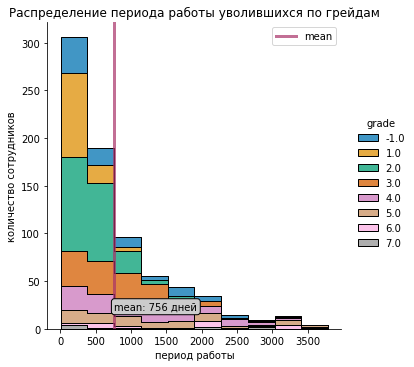

In [120]:
def mean_period(series):
    return int(series.mean())

def hist(series, x,y, bins=10, title=None):
    hist_mean = mean_period(series['period_days'])
    sns.displot(x=df['period_days'], hue='grade', bins=bins, element='step',
                palette='colorblind', multiple='stack', data=series)
    plt.axvline(hist_mean, color='#a83269', linewidth=3,alpha=0.7, label='mean', )
    plt.annotate(f'mean: {hist_mean} дней', xy=(hist_mean+x,y), bbox={'boxstyle':'round', 'fc':'0.8'})
    plt.title(title)
    plt.xlabel('период работы')
    plt.ylabel('количество сотрудников')
    plt.legend()

plt.figure(figsize=(150,150))
hist(df.loc[(df['Дата увольнения'].dt.year>=2014)&(df['Дата увольнения'].dt.year<=2020)], 
     x=10,y=20, bins=10, title='Распределение периода работы уволившихся по грейдам')
plt.show()

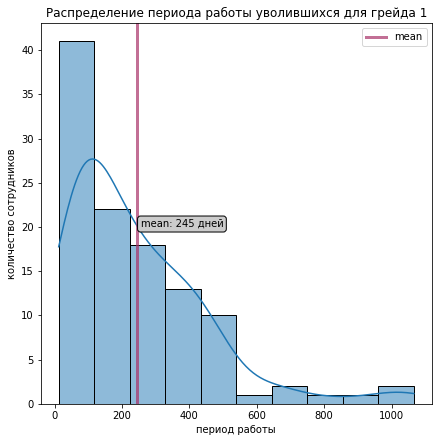

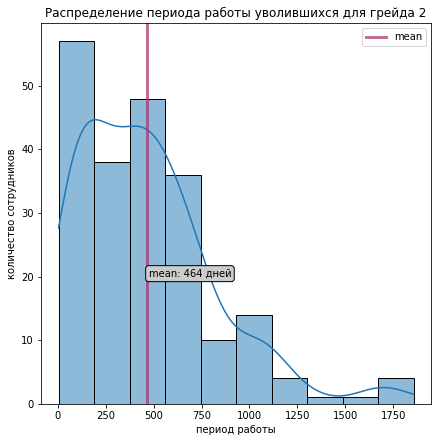

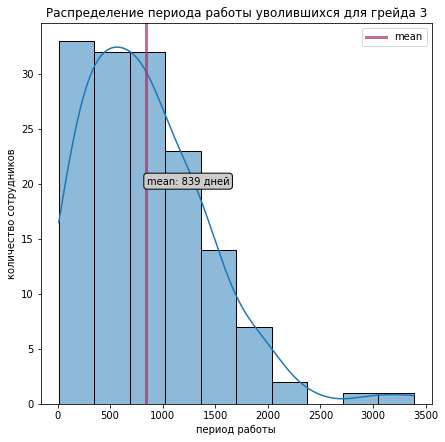

In [121]:
def mean_period(series):
    return int(series.mean())

def hist(series, x,y, bins=10, title=None):
    hist_mean = mean_period(series['period_days'])
    sns.histplot(x=series['period_days'], kde=True, bins=bins)
    plt.axvline(hist_mean, color='#a83269', linewidth=3,alpha=0.7, label='mean', )
    plt.annotate(f'mean: {hist_mean} дней', xy=(hist_mean+x,y), bbox={'boxstyle':'round', 'fc':'0.8'})
    plt.title(title)
    plt.xlabel('период работы')
    plt.ylabel('количество сотрудников')
    plt.legend()

for grade in np.unique(df['grade'].dropna())[1:4]:
    plt.figure(figsize=(7,7))
    data=df.loc[(df['Дата увольнения'].dt.year>=2014)&(df['Дата увольнения'].dt.year<=2020)]
    hist(data[data['grade']==grade], 
         x=10,y=20, bins=10, title='Распределение периода работы уволившихся для грейда ' + str(int(grade)))
    plt.show()

In [122]:
df[df['БН'].isin(df['БН'].value_counts()[0:10].index)].groupby(['БН'])['period_days'].agg(['min', 'mean', 'median', 'max', 'count'])

,min,mean,median,max,count
БН,,,,,
BigData Solutions,5.0,446.690476,242.5,3404.0,42
FastData,59.0,214.857143,176.0,641.0,7
NFO,8.0,646.619835,459.0,3131.0,121
NR,36.0,271.142857,195.0,602.0,7
Neoflex Reporting,10.0,860.760417,663.0,3098.0,96
SOA,4.0,950.691275,662.0,3790.0,149
SOA-support,36.0,527.389474,345.0,3061.0,95
SOA-ВТБ,28.0,514.757576,284.0,3294.0,33
АРГО,6.0,542.176471,370.0,2138.0,34


<Figure size 1440x1440 with 0 Axes>

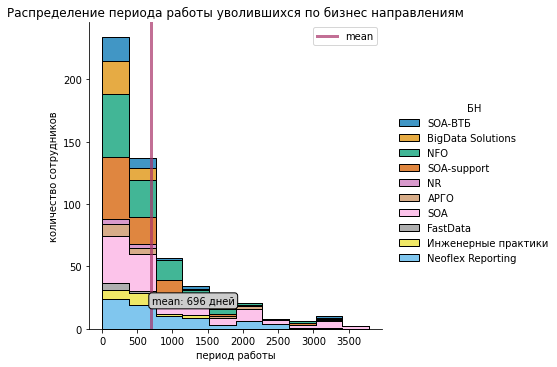

In [123]:
def mean_period(series):
    return int(series.mean())

def hist(series, x,y, bins=10, title=None):
    hist_mean = mean_period(series['period_days'])
    sns.displot(x=df['period_days'], hue='БН', bins=bins, element='step',
                palette='colorblind', multiple='stack', data=series)
    plt.axvline(hist_mean, color='#a83269', linewidth=3,alpha=0.7, label='mean', )
    plt.annotate(f'mean: {hist_mean} дней', xy=(hist_mean+x,y), bbox={'boxstyle':'round', 'fc':'0.8'})
    plt.title(title)
    plt.xlabel('период работы')
    plt.ylabel('количество сотрудников')
    plt.legend()

#for year in np.unique(df['Дата увольнения'].dt.year.dropna()):
plt.figure(figsize=(20,20))
bus_line=df[df['БН'].isin(df['БН'].value_counts()[0:10].index)]
hist(bus_line.loc[(bus_line['Дата увольнения'].dt.year>=2015)&(bus_line['Дата увольнения'].dt.year<=2021)], 
     x=10,y=20, bins=10, title='Распределение периода работы уволившихся по бизнес направлениям')
plt.show()

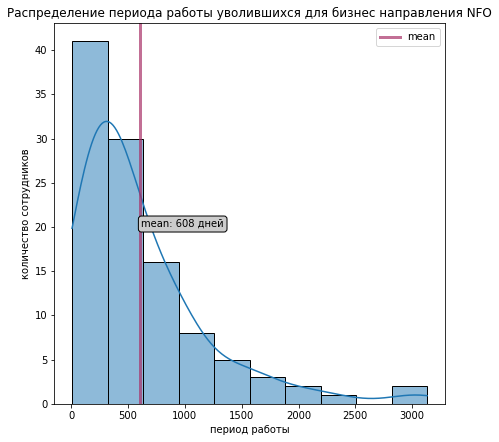

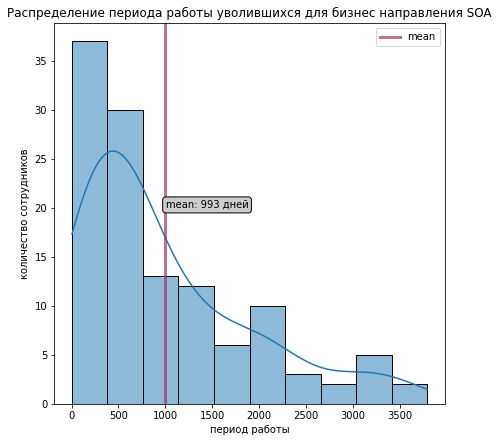

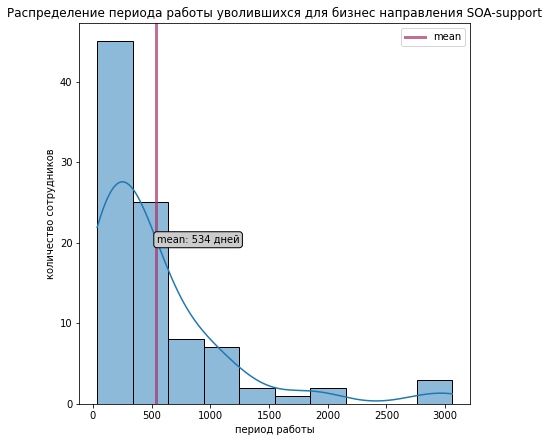

In [124]:
def mean_period(series):
    return int(series.mean())

def hist(series, x,y, bins=10, title=None):
    hist_mean = mean_period(series['period_days'])
    sns.histplot(x=series['period_days'], kde=True, bins=bins)
    plt.axvline(hist_mean, color='#a83269', linewidth=3,alpha=0.7, label='mean', )
    plt.annotate(f'mean: {hist_mean} дней', xy=(hist_mean+x,y), bbox={'boxstyle':'round', 'fc':'0.8'})
    plt.title(title)
    plt.xlabel('период работы')
    plt.ylabel('количество сотрудников')
    plt.legend()

for bl in df['БН'].value_counts()[0:3].index:
    plt.figure(figsize=(7,7))
    data=df.loc[(df['Дата увольнения'].dt.year>=2015)&(df['Дата увольнения'].dt.year<=2021)]
    hist(data[data['БН']==bl], 
         x=10,y=20, bins=10, title='Распределение периода работы уволившихся для бизнес направления ' + bl)
    plt.show()

In [125]:
df2['period_days'] =(df2['Дата увольнения'] - df2['Дата приема']) / np.timedelta64(1,'D')

<Figure size 720x720 with 0 Axes>

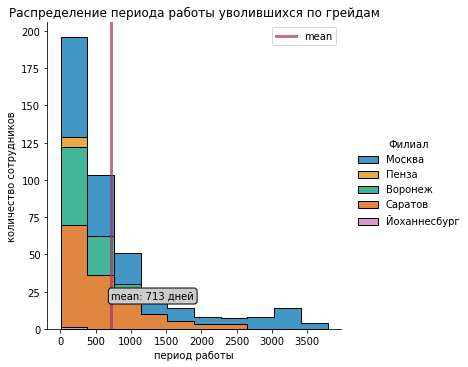

In [126]:
def mean_period(series):
    return int(series.mean())

def hist(series, x,y, bins=10, title=None):
    hist_mean = mean_period(series['period_days'])
    sns.displot(x=df2['period_days'], hue='Филиал', bins=bins, element='step',
                palette='colorblind', multiple='stack', data=series)
    plt.axvline(hist_mean, color='#a83269', linewidth=3,alpha=0.7, label='mean', )
    plt.annotate(f'mean: {hist_mean} дней', xy=(hist_mean+x,y), bbox={'boxstyle':'round', 'fc':'0.8'})
    plt.title(title)
    plt.xlabel('период работы')
    plt.ylabel('количество сотрудников')
    plt.legend()

plt.figure(figsize=(10,10))
hist(df2.loc[(df2['Дата увольнения'].dt.year>=2017)&(df2['Дата увольнения'].dt.year<=2021)], 
     x=10,y=20, bins=10, title='Распределение периода работы уволившихся по грейдам')
plt.show()

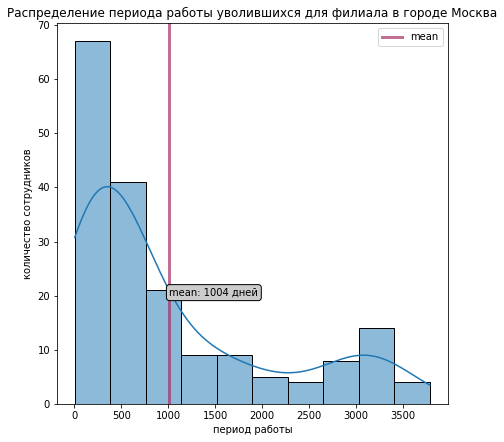

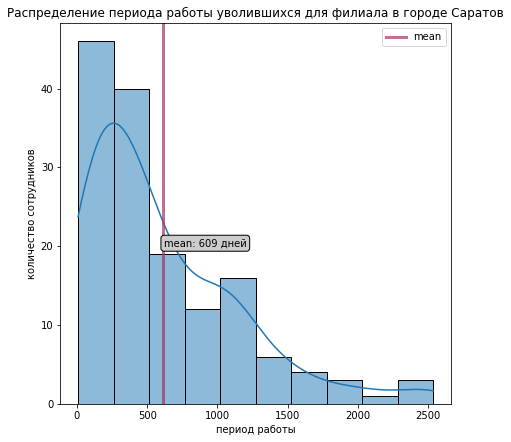

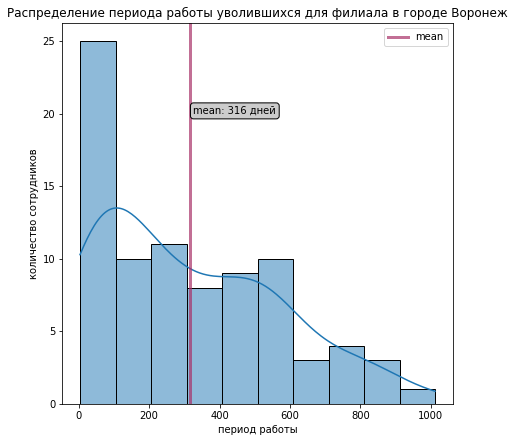

In [127]:
def mean_period(series):
    return int(series.mean())

def hist(series, x,y, bins=10, title=None):
    hist_mean = mean_period(series['period_days'])
    sns.histplot(x=series['period_days'], kde=True, bins=bins)
    plt.axvline(hist_mean, color='#a83269', linewidth=3,alpha=0.7, label='mean', )
    plt.annotate(f'mean: {hist_mean} дней', xy=(hist_mean+x,y), bbox={'boxstyle':'round', 'fc':'0.8'})
    plt.title(title)
    plt.xlabel('период работы')
    plt.ylabel('количество сотрудников')
    plt.legend()

for fil in ['Москва','Саратов','Воронеж']:
    plt.figure(figsize=(7,7))
    data=df2.loc[(df2['Дата увольнения'].dt.year>=2017)&(df2['Дата увольнения'].dt.year<=2021)]
    hist(data[data['Филиал']==fil], 
         x=10,y=20, bins=10, title='Распределение периода работы уволившихся для филиала в городе ' + fil)
    plt.show()

In [128]:
df.loc[df['period_years']<=1, 'Стаж работы'] = 'до года'
df.loc[(df['period_years']>1) & (df['period_years']<=2), 'Стаж работы'] = 'от года до двух'
df.loc[(df['period_years']>2) & (df['period_years']<=3), 'Стаж работы'] = 'от двух до трех лет'
df.loc[(df['period_years']>3) & (df['period_years']<=4), 'Стаж работы'] = 'более трех лет'

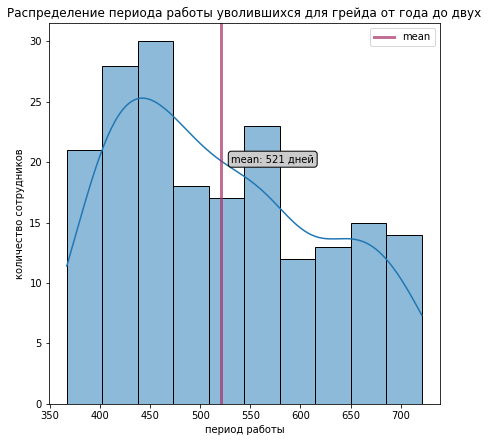

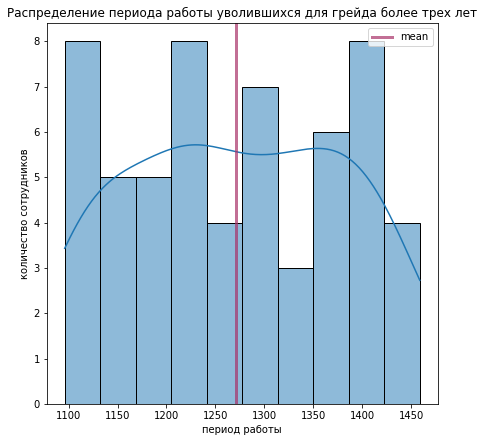

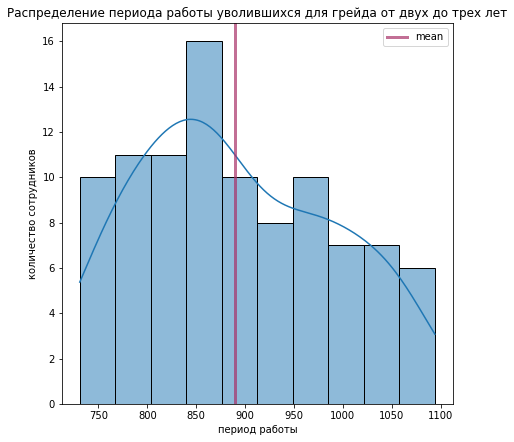

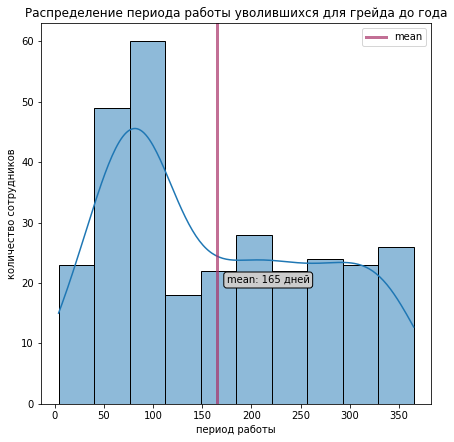

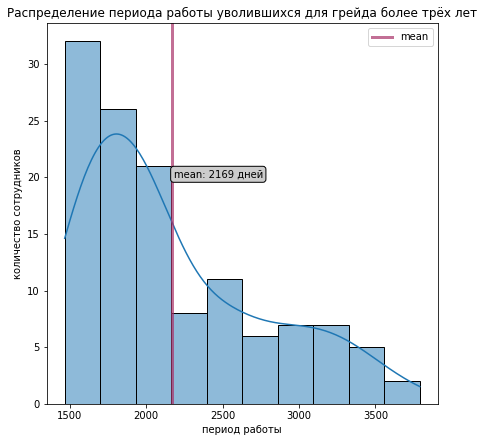

In [129]:
def mean_period(series):
    return int(series.mean())

def hist(series, x,y, bins=10, title=None):
    hist_mean = mean_period(series['period_days'])
    sns.histplot(x=series['period_days'], kde=True, bins=bins)
    plt.axvline(hist_mean, color='#a83269', linewidth=3,alpha=0.7, label='mean', )
    plt.annotate(f'mean: {hist_mean} дней', xy=(hist_mean+x,y), bbox={'boxstyle':'round', 'fc':'0.8'})
    plt.title(title)
    plt.xlabel('период работы')
    plt.ylabel('количество сотрудников')
    plt.legend()

for staj in list(set(df['Стаж работы'].dropna())):
    plt.figure(figsize=(7,7))
    data=df.loc[(df['Дата увольнения'].dt.year>=2014)&(df['Дата увольнения'].dt.year<=2020)]
    hist(data[data['Стаж работы']==staj], 
         x=10,y=20, bins=10, title='Распределение периода работы уволившихся для грейда ' + staj)
    plt.show()